# Цель работы
Мы будем кластеризовать автомобили, основываясь на их характеристиках, с целью выделения групп автомобилей с похожими свойствами. Это может быть полезно, например, для автосалонов или производителей для сегментации рынка.

# загрузим датасет

In [2]:
import pandas as pd
df = pd.read_csv("..//static//csv//car_price_prediction.csv", sep=",")
df


ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 18 columns]

# Предобработка данных
Мы удалим неинформативные столбцы, такие как ID, преобразуем категориальные переменные в числовые (one-hot encoding), а также нормализуем данные для дальнейшего анализа.

In [3]:
# Удаляем неинформативный столбец ID
df = df.drop(columns=["ID"])

# Преобразование категориальных данных в числовые с помощью one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Нормализация числовых данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Визуализация данных с помощью PCA (снижение размерности)
Для визуализации мы применим метод PCA, который уменьшит количество измерений до двух, сохраняя при этом максимальное количество информации.  
Ключевые термины:
- PCA (Principal Component Analysis) — метод снижения размерности, который находит новые оси в данных, вдоль которых разброс максимален, и проецирует данные на эти оси.
- Снижение размерности — процесс упрощения данных за счёт уменьшения числа признаков.

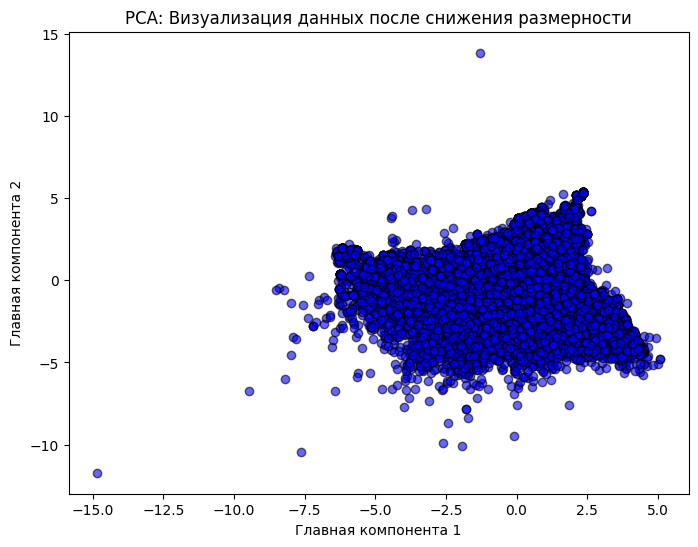

In [4]:
# Импортируем PCA и визуализируем данные
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Применяем PCA для снижения размерности до 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='blue', edgecolor='k', alpha=0.6)
plt.title("PCA: Визуализация данных после снижения размерности")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

# Количество кластеров
Количество кластеров напрямую влияет на результаты кластеризации, так как оно определяет, сколько групп или сегментов будет выделено в данных. Оптимальный выбор количества кластеров важен, чтобы обеспечить баланс между точностью кластеризации и интерпретируемостью результатов.  
# Зачем выбирать количество кластеров?
## Оптимальная сегментация данных
Разное количество кластеров может приводить к слишком мелкому делению (много мелких кластеров) или слишком крупному (слишком обобщённые кластеры).
-Слишком мало кластеров: важные различия в данных могут быть упущены.
-Слишком много кластеров: анализ становится сложным, и кластеры могут быть избыточно раздроблены.
## Интерпретируемость результатов
Оптимальное количество кластеров делает результаты понятными и полезными. Например, выделение 3-5 кластеров может быть удобно для анализа, тогда как 15-20 кластеров усложнят интерпретацию.
## Избежание переобучения или недообучения
Количество кластеров влияет на обобщающую способность модели. Слишком большое количество кластеров может привести к переобучению (модель подстраивается под шум), а слишком малое — к упрощению и игнорированию важных данных.
## Практическая применимость
В бизнес-задачах обычно требуется понятное разделение данных. Например, если мы сегментируем клиентов, 3-5 кластеров проще использовать для таргетинга, чем 20.

# Определение оптимального количества кластеров
Для выбора количества кластеров мы применим:  
- Метод локтя — измеряет инерцию (размерность ошибок внутри кластеров).
- Коэффициент силуэта — показывает, насколько хорошо объекты распределены между кластерами.
  
Ключевые термины:  
- Инерция — сумма квадратов расстояний от точек до центроидов их кластеров. Чем меньше, тем лучше.
- Коэффициент силуэта — оценивает плотность внутри кластеров и разницу между ними (от -1 до 1).

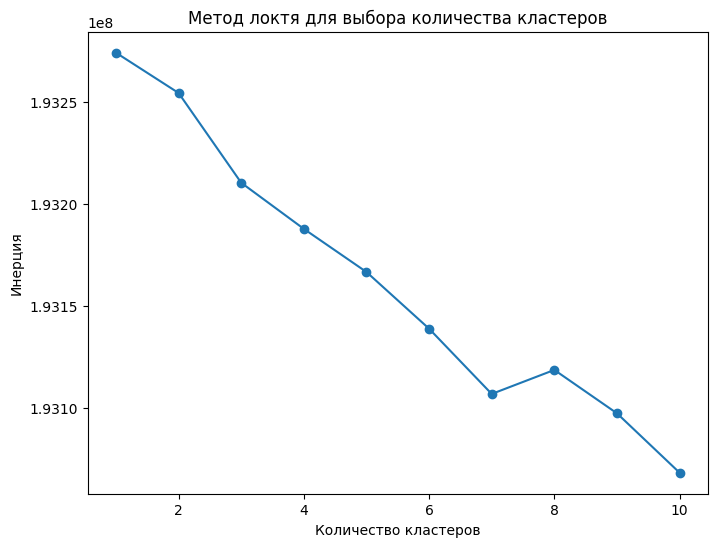

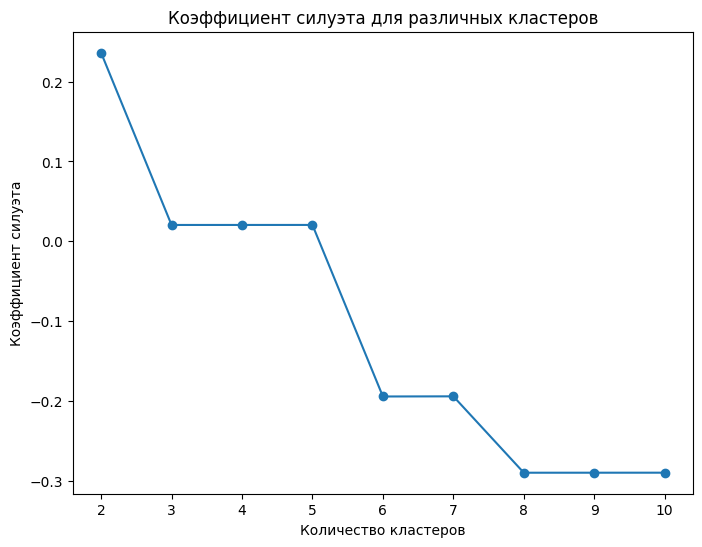

In [5]:
# Метод локтя
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя для выбора количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

# Коэффициент силуэта
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Визуализация коэффициента силуэта
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Коэффициент силуэта для различных кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.show()

# Кластеризация с помощью K-means
После выбора оптимального числа кластеров (например, 3), мы применим K-means для кластеризации и визуализируем результаты.  
Ключевой термин:
- K-means — алгоритм кластеризации, который группирует данные вокруг центров (центроидов) кластеров.

In [5]:
# Кластеризация с помощью K-means
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Визуализация кластеров с использованием PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', alpha=0.6)
plt.title("Кластеры, определенные K-means (PCA)")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.colorbar(label='Кластер')
plt.show()

NameError: name 'KMeans' is not defined